In [1]:
%matplotlib inline
import numpy as np
from pylab import *

In [2]:
#Train/Test
np.random.seed(2)

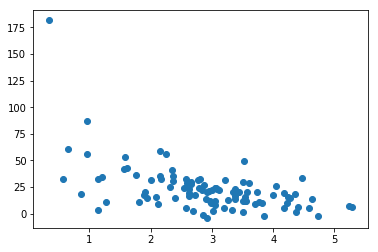

In [3]:
pageSpeeds=np.random.normal(3.0,1.0,100)
purchaseAmount=np.random.normal(50.0,30.0,100)/pageSpeeds
scatter(pageSpeeds,purchaseAmount)

In [4]:
trainX=pageSpeeds[:80]
testX=pageSpeeds[80:]

In [5]:
trainY=purchaseAmount[:80]
testY=purchaseAmount[80:]

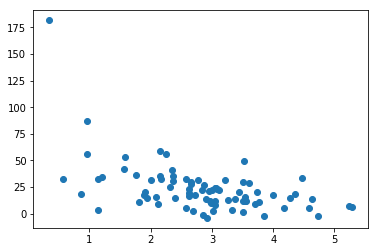

In [7]:
scatter(trainX,trainY)

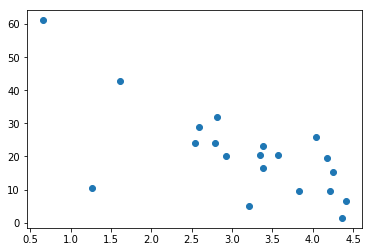

In [8]:
scatter(testX,testY)

In [9]:
x=np.array(trainX)
y=np.array(trainY)

In [10]:
p4=np.poly1d(np.polyfit(x,y,4))

In [11]:
import matplotlib.pyplot as plt

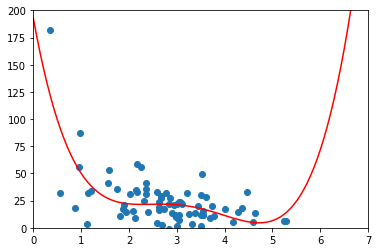

In [12]:
xp=np.linspace(0,7,100)
axes=plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x,y)
plt.plot(xp,p4(xp),c='r')
plt.show()

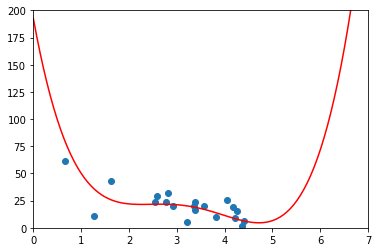

In [13]:
testx=np.array(testX)
testy=np.array(testY)
axes=plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(testx,testy)
plt.plot(xp,p4(xp),c='r')
plt.show()

In [14]:
from sklearn.metrics import r2_score
r2=r2_score(testy,p4(testx))
print(r2)

0.3936269260990418


In [15]:
from sklearn.metrics import r2_score
r2=r2_score(np.array(trainY),p4(np.array(trainX)))
print(r2)

0.4831221655972038


In [16]:
#Naive Bayes Classifier
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [17]:
def readFiles(path):
    for root,dirnames,filenames in os.walk(path):
        for filename in filenames:
            path=os.path.join(root,filename)
            inBody=False
            lines=[]
            f=io.open(path,'r',encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line=='\n':
                    inBody=True
            f.close()
            message='\n'.join(lines)
            yield path,message

In [18]:
def dataFrameFromDirectory(path,classification):
    rows=[]
    index=[]
    for filename,message in readFiles(path):
        rows.append({'message':message,'class':classification})
        index.append(filename)
    return DataFrame(rows,index=index)

In [19]:
data=DataFrame({'message':[],'class':[]})

In [28]:
data=data.append(dataFrameFromDirectory('emails/spam','spam'))
data=data.append(dataFrameFromDirectory('emails/ham','ham'))

In [29]:
data.head()

,class,message
emails/spam\00001.7848dde101aa985090474a91ec93fcf0,spam,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr..."
emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,spam,1) Fight The Risk of Cancer!\n\nhttp://www.adc...
emails/spam\00004.eac8de8d759b7e74154f142194282724,spam,##############################################...
emails/spam\00005.57696a39d7d84318ce497886896bf90d,spam,I thought you might like these:\n\n1) Slim Dow...


In [30]:
vectorizer=CountVectorizer()
counts=vectorizer.fit_transform(data['message'].values)

In [31]:
classifier=MultinomialNB()
targets=data['class'].values
classifier.fit(counts,targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
examples=['Free Money now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts=vectorizer.transform(examples)
predictions=classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

In [33]:
#K-Mean classifier
from numpy import random,array
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N,k):
    random.seed(10)
    pointsPerCluster=float(N)/k
    X=[]
    for i in range(k):
        incomeCentroid=random.uniform(20000.0,200000.0)
        ageCentroid=random.uniform(20.0,70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid,10000.0),random.normal(ageCentroid,2.0)])
    X=array(X)
    return X

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


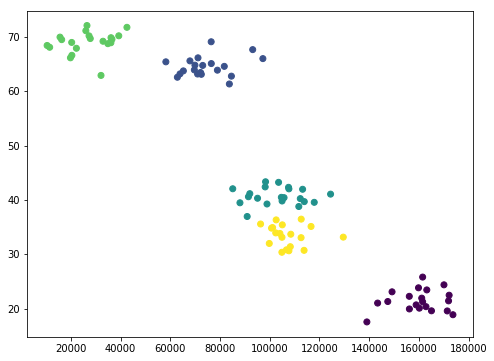

In [35]:
data=createClusteredData(100,5)
model=KMeans(n_clusters=5)
#Note I'm scaling the data to normalize it! Important for good results
model=model.fit(scale(data))
#We can look at the clusters each data point was assigned to 
print (model.labels_)
#And we'll visualize it
plt.figure(figsize=(8,6))
plt.scatter(data[:,0],data[:,1],c=model.labels_.astype(float))
plt.show()

In [36]:
#Decision Tree classifier
import numpy as np
import pandas as pd
from sklearn import tree

In [37]:
input_file="PastHires.csv"
df=pd.read_csv(input_file,header=0)

In [38]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [39]:
d={'Y':0,'N':1}
df['Hired']=df['Hired'].map(d)
d={'Y':1,'N':0}
df['Employed?']=df['Employed?'].map(d)
df['Top-tier school']=df['Top-tier school'].map(d)
df['Interned']=df['Interned'].map(d)
d={'BS':0,'MS':1,'PhD':2}
df['Level of Education']=df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,0
1,0,0,0,0,1,1,0
2,7,0,6,0,0,0,1
3,2,1,1,1,1,0,0
4,20,0,2,2,1,0,1


In [40]:
features=list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [41]:
y=df["Hired"]
X=df[features]
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,y)

In [42]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [43]:
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

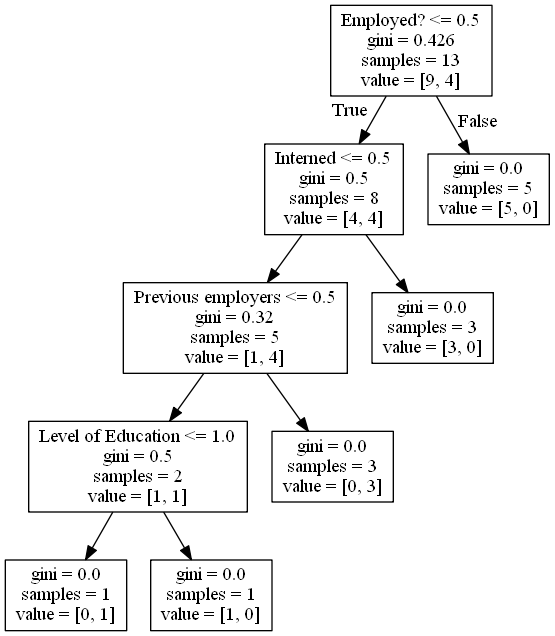

In [44]:
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf=clf.fit(X,y)
#Predict employment of an employed 10-year veteran
print(clf.predict([[10,1,4,0,0,0]]))
#... and an unemployed 10-year veteran
print(clf.predict([[10,0,4,0,0,0]]))

[0]
[1]


In [56]:
#Support Vector Machines
import numpy as np

In [57]:
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N,k):
    pointsPerCluster=float(N)/k
    X=[]
    y=[]
    for i in range(k):
        incomeCentroid=np.random.uniform(20000.0,200000.0)
        ageCentroid=np.random.uniform(20.0,70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid,10000.0),np.random.normal(ageCentroid,2.0)])
            y.append(i)
    X=np.array(X)
    y=np.array(y)
    return X,y

In [58]:
%matplotlib inline
from pylab import *

In [59]:
(X,y)=createClusteredData(100,5)

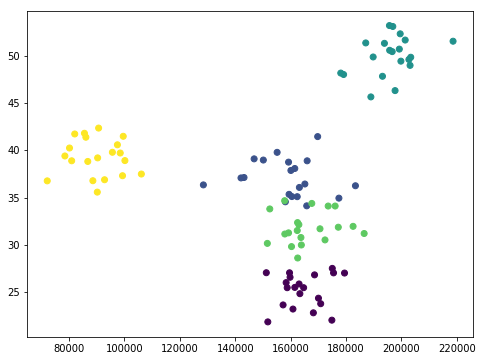

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))
plt.show()

In [61]:
from sklearn import svm,datasets
C=1.0
svc=svm.SVC(kernel='linear',C=C).fit(X,y)

In [62]:
def plotPredictions(clf):
    xx,yy=np.meshgrid(np.arange(0,250000,10),np.arange(10,70,0.5))
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    plt.figure(figsize=(8,6))
    Z=Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
    plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))
    plt.show()

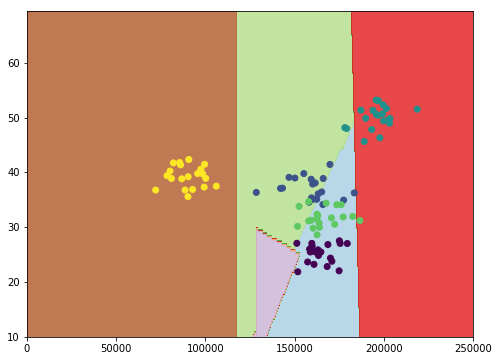

In [63]:
plotPredictions(svc)

In [64]:
svc.predict([[200000,40]])

array([2])

In [65]:
svc.predict([[500000,65]])

array([2])